---
# **Table of Contents**
---

**1.** [**Problem Statement**](#Section1)<br>

**2.** [**Installing & Importing Libraries**](#Section2)<br>

**3.** [**Data Acquisition**](#Section3)<br>

**4.** [**Data Audit and Data Preparation**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)
  - **4.3** [**Number of Uniques**](#Section43)
  - **4.4** [**Data Preparation and Verification**](#Section44)

**5.** [**Exploratory Data Analysis**](#Section5)<br>
  - **5.1** [**Univariate Analysis**](#Section51)
      - **5.1.1** [**Item_Weight Analysis**](#Section511)
      - **5.1.2** [**Item_Fat_Content Analysis**](#Section512)
      - **5.1.3** [**Item_Visibility Analysis**](#Section513)
      - **5.1.4** [**Item_Type Analysis**](#Section514)
      - **5.1.5** [**Item_MRP Analysis**](#Section515)
  
  - **5.2** [**Bivariate Analysis**](#Section52)
      - **5.2.1** [**Chi Squared Test (Categorical Variables)**](#Section521)
      
  - **5.3** [**Multivariate Analysis**](#Section53)
      - **5.3.1** [**Encoding for Categorical variables**](#Section531)
      - **5.3.2** [**Divide the data into X and Y**](#Section532)
      - **5.3.3** [**Train Test Split**](#Section533)
      - **5.3.4** [**Linear Regression**](#Section534)
      - **5.3.5** [**Decision tree Regressor**](#Section535)
      - **5.3.6** [**Random forest Regressor**](#Section536)
      - **5.3.7** [**Random Forest with GridSearchCV (HyperParameter Tuning)**](#Section537)
      - **5.3.8** [**Random Forest Model with RandomizedSearchCV (HyperParameter Tuning)**](#Section538)
      - **5.3.9** [**K nearest neighbors**](#Section539)
      - **5.3.10** [**Adaboost**](#Section5310)
      - **5.3.11** [**Gradient Boosting**](#Section5311)
      - **5.3.12** [**XGBoost**](#Section5312)

 
**6.** [**Model Evaluation on Test Dataset**](#Section6)<br>
  - **6.1** [**Test Data Information**](#Section61)
  - **6.2** [**Data Preparation and Verification like train dataset**](#Section62)
  - **6.3** [**Predict with best model (Gradient Boosting)**](#Section63)
  - **6.4** [**Create Sample submission file for Uploading and Checking**](#Section64)


---
<a name = Section1></a>
# **1. Problem Statement**
---

- The data scientists at BigMart have collected **2013 sales data for 1559 products across 10 stores** in different cities. Also, certain **attributes of each product and store** have been defined. The aim is to build a **predictive model and predict the sales of each product at a particular outlet.**


- Using this model, BigMart will try to understand the **properties of products and outlets** which play a key role in **increasing sales.**

---
<a name = Section2></a>
# **2. Installing & Importing Libraries**
---

In [1]:
import warnings                                                    
warnings.filterwarnings("ignore") 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns  

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

import datetime

---
<a name = Section3></a>
# **3. Data Acquisition**
---
- We have train and test data in seperate files.


- Initially we will deal with train dataset only.


- We will train our model and then we will go for test dataset.


- Train Dataset:
| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 8523 | 12 | 799.2 KB| 


| Id | Features |
| :-- | :--|
|01|**Item_Identifier**|
|02|**Item_Weight**|
|03|**Item_Fat_Content**|
|04|**Item_Visibility**|
|05|**Item_Type**|
|06|**Item_MRP**|
|07|**Outlet_Identifier**|
|08|**Outlet_Establishment_Year**|
|09|**Outlet_Size**|
|10|**Outlet_Location_Type**|
|11|**Outlet_Type**|
|12|**Item_Outlet_Sales**|

In [2]:
train_BM = pd.read_csv("train_v9rqX0R (3).csv")

In [3]:
print('Data Shape:', train_BM.shape)
train_BM.head()

Data Shape: (8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_BM = pd.read_csv("test_AbJTz2l (3).csv")

In [5]:
print('Data Shape:', test_BM.shape)
test_BM.head()

Data Shape: (5681, 11)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


<a name = Section4></a>

---
# **4. Data Audit and Data Preparation**

---

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the continuous data**.

In [6]:
train_BM.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [7]:
train_BM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
(train_BM.shape[0] - train_BM.count()).sort_values(ascending = False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Observations:**

- At high level, we can observe that there are **missing values** in our dataset in the columns Item_Weight and Outlet_Size.

<a name = Section43></a>
### **4.3 Number of Uniques**

- In this section we will get **information about the unique values** in the dataset.

In [9]:
train_BM.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

<a name = Section44></a>
### **4.4 Data Preparation and Verification**

- Handling of missing Data and Inconsistent Data

- Feature Engineering

- Drop Identifier and Redundant Column

In [10]:
train_BM['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [11]:
# outlet age is much better compared to establishment year
train_BM['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [12]:
def data_prep(train_BM):
    train_BM["Item_Weight"] = np.where(train_BM["Item_Weight"].isna(),train_BM["Item_Weight"].median(skipna = True), train_BM["Item_Weight"])   # missing data
    train_BM["Outlet_Size"] = np.where(train_BM["Outlet_Size"].isna(),train_BM["Outlet_Size"].mode()[0], train_BM["Outlet_Size"])   # misisng data
    train_BM["Item_Fat_Content"] = train_BM["Item_Fat_Content"].replace("low fat","Low Fat")   # inconsistent data
    train_BM["Item_Fat_Content"] = train_BM["Item_Fat_Content"].replace("LF","Low Fat")    # inconsistent data
    train_BM["Item_Fat_Content"] = train_BM["Item_Fat_Content"].replace("reg","Regular")    # inconsistent data
    train_BM['Years_Of_business'] = datetime.date.today().year - train_BM['Outlet_Establishment_Year']  # feature engineering
    train_BM.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'] ,inplace = True, axis = 1) # Drop Identifiers and Redundant column
    return train_BM

In [13]:
train_BM_new = data_prep(train_BM)

#### Let's verify

In [14]:
train_BM_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
 9   Years_Of_business     8523 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [15]:
train_BM_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Of_business
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,15
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,26
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,37


In [16]:
train_BM_new.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Years_Of_business
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,2181.288914,26.168133
std,4.22724,0.051598,62.275067,1706.499616,8.371760
min,4.55500,0.000000,31.290000,33.290000,15.000000
25%,9.31000,0.026989,93.826500,834.247400,20.000000
50%,12.60000,0.053931,143.012800,1794.331000,25.000000
75%,16.00000,0.094585,185.643700,3101.296400,37.000000
max,21.35000,0.328391,266.888400,13086.964800,39.000000


In [17]:
# ----------------- data is now analizable ------------------------ #

<a name = Section5></a>

---
# **5. Exploratory Data Analysis**
---

<a name = Section51></a>
### **5.1  Univariate Analysis**

- In this section we will do univariate analysis of different features.

In [18]:
train_BM_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
 9   Years_Of_business     8523 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


<a name = Section511></a>
#### **5.1.1  Item_Weight Analysis**

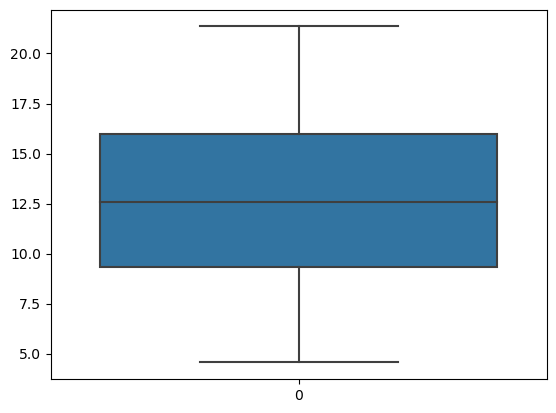

In [19]:
sns.boxplot(train_BM_new['Item_Weight'])   
plt.show()

**Observation:**

- Item_Weight is homogeneous in nature and no outliers.

<a name = Section512></a>
#### **5.1.2  Item_Fat_Content Analysis**

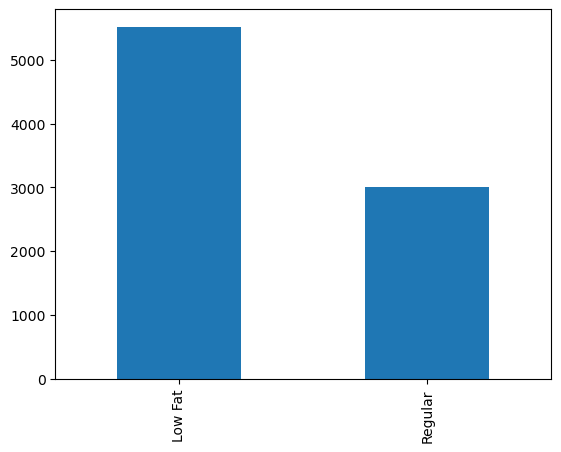

In [20]:
train_BM_new['Item_Fat_Content'].value_counts().plot(kind = 'bar')
plt.show()

<a name = Section513></a>
#### **5.1.3  Item_Visibility Analysis**

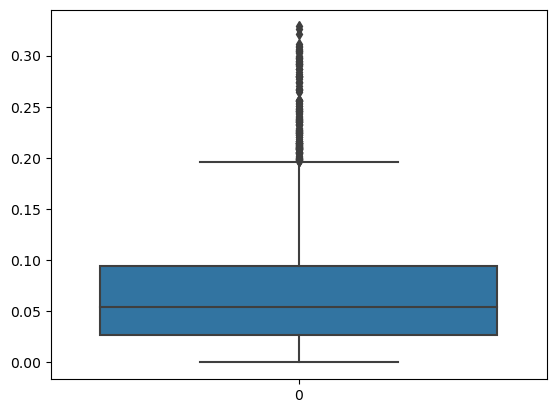

In [21]:
sns.boxplot(train_BM_new['Item_Visibility'])
plt.show()

**Observations:**

- Data is non linear in nature.


- Non-lineairity must be learnt by the models itself as outliers are real values and let the model learn them and decide how to treat them and hence no outlier treatment.

<a name = Section514></a>
#### **5.1.4  Item_Type Analysis**

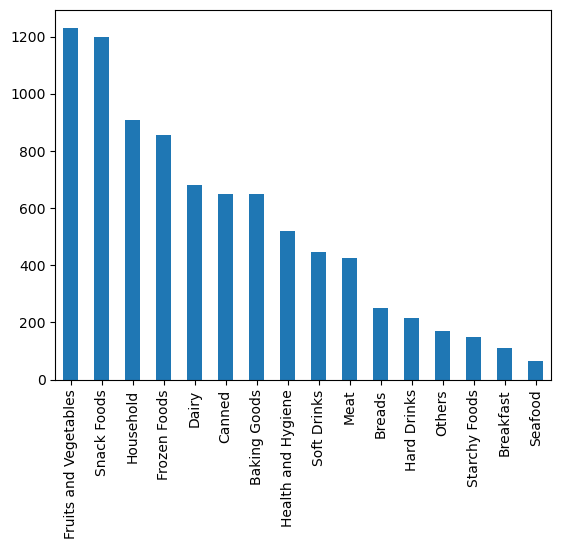

In [22]:
train_BM_new['Item_Type'].value_counts().plot(kind = 'bar')
plt.show()

**Observations:**

- Data is non linear in nature.

<a name = Section515></a>
#### **5.1.5  Item_MRP Analysis**

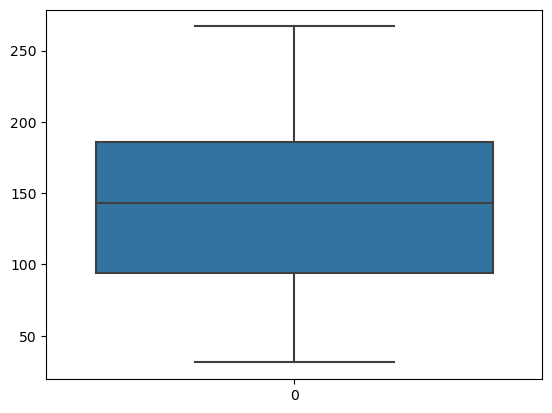

In [23]:
sns.boxplot(train_BM_new['Item_MRP'])
plt.show()

**Observations:**

- No otliers.

<a name = Section52></a>
### **5.2  Bivariate Analysis**

- In this section we will do bivariate analysis of different features.

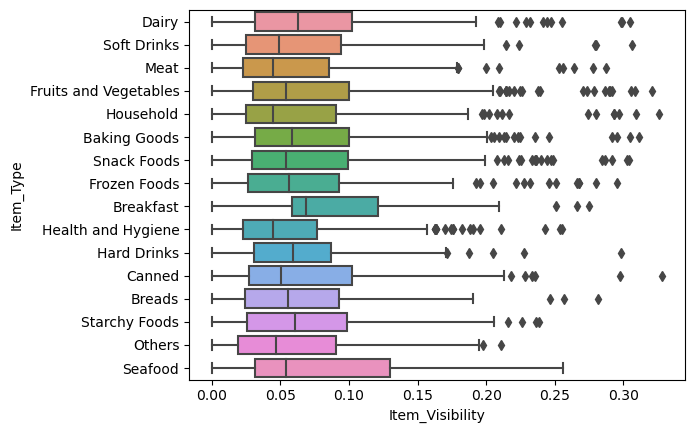

In [24]:
sns.boxplot(x = train_BM_new['Item_Visibility'], y = train_BM_new['Item_Type'])
plt.show()

**Observation:**

- Different Items has different visibility.

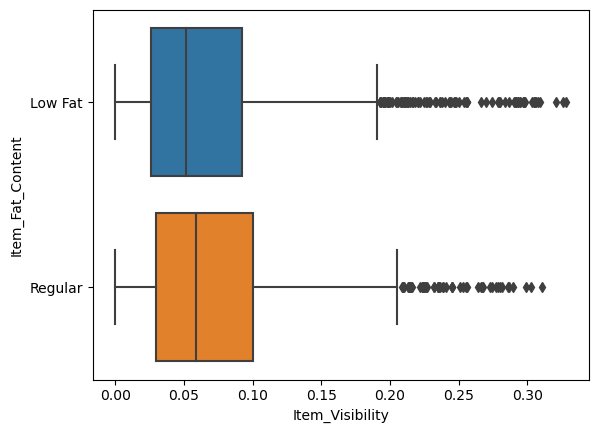

In [25]:
sns.boxplot(x = train_BM_new['Item_Visibility'], y = train_BM_new['Item_Fat_Content'])
plt.show()

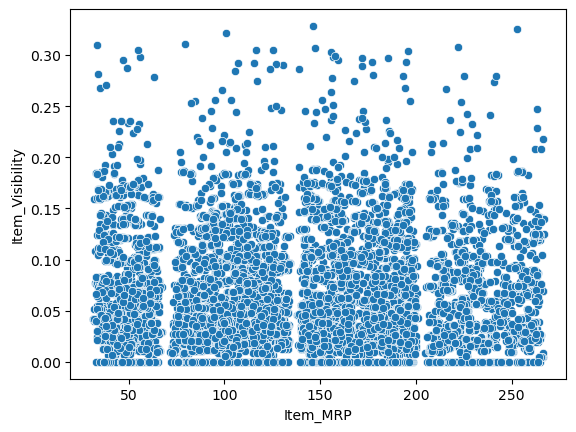

In [26]:
sns.scatterplot(y = train_BM_new['Item_Visibility'], x = train_BM_new['Item_MRP'])
plt.show()

**Observations:**

- Item MRP and Visibility are not much related.

<a name = Section521></a>
#### **5.2.1  Chi Squared Test (Categorical Variables)**

In [27]:
train_BM_new["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [28]:
train_BM_new['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [29]:
# Contingency Table

pd.crosstab(train_BM_new["Outlet_Size"],train_BM_new['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,1855,2418
Small,1458,930,0


In [30]:
from scipy.stats import chi2_contingency

def chi_sq_test(var1, var2):
    contg_table = pd.crosstab(var1,var2)
    _,p,_,_ = chi2_contingency(contg_table)
    if p < 0.05:     # lesser p value, better it is ( p value - prob. value, 5% chance of error is acceptable)
        print("Accept the alternate hypothesis (there is relation between var1 and var2)", round(p,2))
    else:
        print("Failed to reject null hypothesis (there is no relation between var1 and var2)", round(p,2))
    return contg_table

In [31]:
chi_sq_test(train_BM_new["Outlet_Size"],train_BM_new['Outlet_Location_Type'])

# Null and Alternate Hypothesis are

# Null: Outlet size and Outlet location are independent
# Alternate: Outlet size and Outlet Location are dependent

Accept the alternate hypothesis (there is relation between var1 and var2) 0.0


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,1855,2418
Small,1458,930,0


In [32]:
chi_sq_test(train_BM_new["Outlet_Size"],train_BM_new['Outlet_Type'])

Accept the alternate hypothesis (there is relation between var1 and var2) 0.0


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,555,2785,928,935
Small,528,1860,0,0


In [33]:
chi_sq_test(train_BM_new["Outlet_Location_Type"],train_BM_new['Outlet_Type'])

Accept the alternate hypothesis (there is relation between var1 and var2) 0.0


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,528,1860,0,0
Tier 2,0,2785,0,0
Tier 3,555,932,928,935


**Obervations:**
    
- No sampling error, genuine relationship between above 2 categorilcal variables
- We are accepting Alternate hypotheis as in there is dependancy between both the mentioned variables.

<a name = Section53></a>
### **5.3  Multivariate Analysis**

- In this section we will do multivariate analysis of different features.

<a name = Section531></a>
#### **5.3.1  Encoding for Categorical variables**

In [34]:
train_BM_new = pd.get_dummies(train_BM,columns = ['Item_Fat_Content','Item_Type','Outlet_Size',
                                                'Outlet_Location_Type','Outlet_Type'])

In [35]:
train_BM_new.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Years_Of_business,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,25,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,15,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,25,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,26,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,37,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [36]:
train_BM_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Item_Outlet_Sales                8523 non-null   float64
 4   Years_Of_business                8523 non-null   int64  
 5   Item_Fat_Content_Low Fat         8523 non-null   uint8  
 6   Item_Fat_Content_Regular         8523 non-null   uint8  
 7   Item_Type_Baking Goods           8523 non-null   uint8  
 8   Item_Type_Breads                 8523 non-null   uint8  
 9   Item_Type_Breakfast              8523 non-null   uint8  
 10  Item_Type_Canned                 8523 non-null   uint8  
 11  Item_Type_Dairy                  8523 non-null   uint8  
 12  Item_Type_Frozen Foo

<a name = Section532></a>
#### **5.3.2  Divide the data into X and Y**

In [37]:
y = train_BM_new['Item_Outlet_Sales']
X = train_BM_new.drop(['Item_Outlet_Sales'], axis = 1)

<a name = Section533></a>
#### **5.3.3  Train Test Split**

In [38]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 123)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6818, 32)
(1705, 32)
(6818,)
(1705,)


<a name = Section534></a>
#### **5.3.4 Linear Regression**

In [40]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

In [41]:
# Model Evaluation Function

def model_eval(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    r2 = r2_score(actual,predicted)

    print("The RMSE value for the model is :",round(rmse,2))
    print("The R2 score for the model is :",round(r2,2))

In [42]:
print("Training Model :")
model_eval(y_train,lr_pred_train)

Training Model :
The RMSE value for the model is : 1131.21
The R2 score for the model is : 0.56


In [43]:
print("Testing Model :")
model_eval(y_test,lr_pred_test)

Testing Model :
The RMSE value for the model is : 1113.85
The R2 score for the model is : 0.57


<a name = Section535></a>
#### **5.3.5 Decision Tree Regressor**

In [44]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)
dtree_pred_train = dtree.predict(X_train)
dtree_pred_test = dtree.predict(X_test)

In [45]:
print("Training Model :")
model_eval(y_train,dtree_pred_train)
print("Testing Model :")
model_eval(y_test,dtree_pred_test)

Training Model :
The RMSE value for the model is : 0.0
The R2 score for the model is : 1.0
Testing Model :
The RMSE value for the model is : 1566.88
The R2 score for the model is : 0.14


<a name = Section536></a>
#### **5.3.6 Random Forest Regressor**

In [46]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

In [47]:
print("Training Model :")
model_eval(y_train,rf_pred_train)
print("Testing Model :")
model_eval(y_test,rf_pred_test)

Training Model :
The RMSE value for the model is : 427.56
The R2 score for the model is : 0.94
Testing Model :
The RMSE value for the model is : 1148.91
The R2 score for the model is : 0.54


<a name = Section537></a>
#### **5.3.7 Random Forest with GridSearchCV (HyperParameter Tuning)**

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {
    'n_estimators': [50, 100, 200],    # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]         # Whether bootstrap samples are used when building trees
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)
print(best_model)

{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200)


In [85]:
rf_hyp = RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200)
rf_hyp.fit(X_train,y_train)
rf_pred_train_hyp = rf.predict(X_train)
rf_pred_test_hyp = rf.predict(X_test)

In [86]:
print("Training Model :")
model_eval(y_train,rf_pred_train_hyp)
print("Testing Model :")
model_eval(y_test,rf_pred_test_hyp)

Training Model :
The RMSE value for the model is : 427.56
The R2 score for the model is : 0.94
Testing Model :
The RMSE value for the model is : 1148.91
The R2 score for the model is : 0.54


<a name = Section538></a>
#### **5.3.8 Random Forest Model with RandomizedSearchCV (HyperParameter Tuning)**

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [54]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [55]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,  n_iter=100, verbose = 2)
rf_random.fit(X_train, y_train)

best_params = rf_random.best_params_
best_model = rf_random.best_estimator_

print(best_params)
print(best_model)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   5.9s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   6.3s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   5.8s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   5.9s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   6.2s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_es

[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  22.6s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  22.9s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  23.2s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  22.9s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  22.7s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=False, max_depth=1

[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  17.3s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  17.1s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  17.0s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  17.3s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  17.5s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=2

[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   7.4s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   7.5s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   7.4s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   7.3s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   7.4s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.0s
[CV] END bootstrap=True, max_depth=8

[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=  27.8s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=  27.5s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=  27.5s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=  27.9s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=  27.9s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1600; total time=   0.0s
[CV] END bootstrap=False, m

[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  26.6s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  26.6s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  31.2s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  27.8s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  26.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   5.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   5.8s
[CV] END bootstrap=True, max_

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.9s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.9s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.9s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   6.3s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   6.4s
[CV] END bootstrap=False, max_depth=40,

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   5.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   5.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   5.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   5.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   5.2s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=True, max_depth=3

{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=5, n_estimators=800)


In [87]:
rf_random = RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=5, n_estimators=800)
rf_random.fit(X_train,y_train)
rf_pred_train_hyp_RSCV = rf_random.predict(X_train)
rf_pred_test_hyp_RSCV = rf_random.predict(X_test)

In [88]:
print("Training Model :")
model_eval(y_train,rf_pred_train_hyp_RSCV)
print("Testing Model :")
model_eval(y_test,rf_pred_test_hyp_RSCV)

Training Model :
The RMSE value for the model is : 937.97
The R2 score for the model is : 0.7
Testing Model :
The RMSE value for the model is : 1084.04
The R2 score for the model is : 0.59


<a name = Section539></a>
#### **5.3.9 K nearest neighbors**

In [58]:
np.sqrt(8523)

92.32009532057471

In [59]:
knn = KNeighborsRegressor(n_neighbors = 85, p=1)
knn.fit(X_train, y_train)
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)

In [60]:
print("Training Model :")
model_eval(y_train,knn_pred_train)
print("Testing Model :")
model_eval(y_test,knn_pred_test)

Training Model :
The RMSE value for the model is : 1237.57
The R2 score for the model is : 0.48
Testing Model :
The RMSE value for the model is : 1253.63
The R2 score for the model is : 0.45


<a name = Section5310></a>
#### **5.3.10 Adaboost**

In [61]:
from sklearn.ensemble import AdaBoostRegressor

In [62]:
ada = AdaBoostRegressor(random_state = 123)
ada.fit(X_train,y_train)
ada_pred_train = ada.predict(X_train)
ada_pred_test = ada.predict(X_test)

In [63]:
print("Training Model :")
model_eval(y_train,ada_pred_train)  
print("Testing Model :")
model_eval(y_test,ada_pred_test)

Training Model :
The RMSE value for the model is : 1258.68
The R2 score for the model is : 0.46
Testing Model :
The RMSE value for the model is : 1271.47
The R2 score for the model is : 0.44


In [64]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, ada.feature_importances_):
    feats[feature] = importance #add the name/value pair

In [65]:
print(feats)

{'Item_Weight': 0.00403826005958624, 'Item_Visibility': 0.14494246401866703, 'Item_MRP': 0.5197959300598695, 'Years_Of_business': 0.012181451691770553, 'Item_Fat_Content_Low Fat': 0.0, 'Item_Fat_Content_Regular': 0.002683784440480429, 'Item_Type_Baking Goods': 0.008117243032444215, 'Item_Type_Breads': 0.0, 'Item_Type_Breakfast': 0.0, 'Item_Type_Canned': 0.0, 'Item_Type_Dairy': 0.0002078318240027162, 'Item_Type_Frozen Foods': 0.0008911335283631201, 'Item_Type_Fruits and Vegetables': 0.0, 'Item_Type_Hard Drinks': 0.0, 'Item_Type_Health and Hygiene': 0.0028567492490110973, 'Item_Type_Household': 0.005983096473515637, 'Item_Type_Meat': 0.0008708978810090345, 'Item_Type_Others': 0.0, 'Item_Type_Seafood': 0.00023217320143290542, 'Item_Type_Snack Foods': 0.014579477382700368, 'Item_Type_Soft Drinks': 0.003706459086949314, 'Item_Type_Starchy Foods': 0.0, 'Outlet_Size_High': 0.0021849085773743473, 'Outlet_Size_Medium': 0.0, 'Outlet_Size_Small': 0.0, 'Outlet_Location_Type_Tier 1': 0.000468489880

In [66]:
importances = list(zip(ada.feature_importances_, X_train.columns))
importances.sort(reverse=True)
print(importances)

[(0.5197959300598695, 'Item_MRP'), (0.16571977606231955, 'Outlet_Type_Supermarket Type3'), (0.14494246401866703, 'Item_Visibility'), (0.07785312484631976, 'Outlet_Type_Grocery Store'), (0.0326867487038111, 'Outlet_Type_Supermarket Type1'), (0.014579477382700368, 'Item_Type_Snack Foods'), (0.012181451691770553, 'Years_Of_business'), (0.008117243032444215, 'Item_Type_Baking Goods'), (0.005983096473515637, 'Item_Type_Household'), (0.00403826005958624, 'Item_Weight'), (0.003706459086949314, 'Item_Type_Soft Drinks'), (0.0028567492490110973, 'Item_Type_Health and Hygiene'), (0.002683784440480429, 'Item_Fat_Content_Regular'), (0.0021849085773743473, 'Outlet_Size_High'), (0.0008911335283631201, 'Item_Type_Frozen Foods'), (0.0008708978810090345, 'Item_Type_Meat'), (0.0004684898803730336, 'Outlet_Location_Type_Tier 1'), (0.00023217320143290542, 'Item_Type_Seafood'), (0.0002078318240027162, 'Item_Type_Dairy'), (0.0, 'Outlet_Type_Supermarket Type2'), (0.0, 'Outlet_Size_Small'), (0.0, 'Outlet_Size_

<a name = Section5311></a>
#### **5.3.11 Gradient Boosting**

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

In [68]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
gb_pred_train = gb.predict(X_train)
gb_pred_test = gb.predict(X_test)

In [69]:
print("Training Model :")
model_eval(y_train,gb_pred_train)  
print("Testing Model :")
model_eval(y_test,gb_pred_test)

Training Model :
The RMSE value for the model is : 1032.93
The R2 score for the model is : 0.64
Testing Model :
The RMSE value for the model is : 1072.04
The R2 score for the model is : 0.6


In [70]:
importances_GB = list(zip(gb.feature_importances_, X_train.columns))
importances_GB.sort(reverse=True)
print(importances_GB)

[(0.5451247575413376, 'Item_MRP'), (0.2941214034235353, 'Outlet_Type_Grocery Store'), (0.06516938645208471, 'Outlet_Type_Supermarket Type3'), (0.06236817646446347, 'Years_Of_business'), (0.01435672259029769, 'Outlet_Type_Supermarket Type1'), (0.007382629557152448, 'Item_Visibility'), (0.004879644548183514, 'Item_Weight'), (0.0007980534205271413, 'Item_Type_Fruits and Vegetables'), (0.0005822266859427778, 'Item_Type_Snack Foods'), (0.0005503074696395415, 'Item_Type_Health and Hygiene'), (0.0005181407189610449, 'Item_Type_Dairy'), (0.0005115388782904548, 'Item_Type_Hard Drinks'), (0.0005115235954736197, 'Item_Type_Baking Goods'), (0.00034243215693834106, 'Item_Type_Seafood'), (0.0003382388268383183, 'Item_Type_Frozen Foods'), (0.00029227504885284916, 'Outlet_Type_Supermarket Type2'), (0.00028441259392255334, 'Item_Type_Household'), (0.00027657125570922645, 'Outlet_Size_Medium'), (0.0002527526900819239, 'Item_Type_Soft Drinks'), (0.00023269489535020503, 'Outlet_Location_Type_Tier 3'), (0.

<a name = Section5312></a>
#### **5.3.12 XGBoost**

In [71]:
!pip3 install xgboost  

In [72]:
import xgboost as xg

In [73]:
xgb = xg.XGBRegressor()
xgb.fit(X_train,y_train)
xgb_pred_train = xgb.predict(X_train)
xgb_pred_test = xgb.predict(X_test)

In [74]:
print("Training Model :")
model_eval(y_train, xgb_pred_train)
print("Testing Model :")
model_eval(y_test, xgb_pred_test)

Training Model :
The RMSE value for the model is : 616.27
The R2 score for the model is : 0.87
Testing Model :
The RMSE value for the model is : 1159.85
The R2 score for the model is : 0.53


## BEST MODEL - GRADIENT BOOSTING 

<a name = Section6></a>

---
# **6. Model Evaluation on Test Dataset**
---

<a name = Section61></a>
### **6.1 Test Data Information**

- In this section we will see the **information about the types of features of Test dataset**.

In [75]:
test_BM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


<a name = Section62></a>
### **6.2 Data Preparation and Verification like train dataset**

- Handling of missing Data and Inconsistent Data

- Feature Engineering

- Drop Identifier and Redundant Column

In [76]:
data_prep(test_BM)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Of_business
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1,25
1,8.300,Regular,0.038428,Dairy,87.3198,Medium,Tier 2,Supermarket Type1,17
2,14.600,Low Fat,0.099575,Others,241.7538,Medium,Tier 3,Grocery Store,26
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,Medium,Tier 2,Supermarket Type1,17
4,12.500,Regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3,39
...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,Snack Foods,141.3154,Small,Tier 1,Supermarket Type1,27
5677,7.600,Regular,0.142991,Starchy Foods,169.1448,Medium,Tier 3,Supermarket Type2,15
5678,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,Medium,Tier 2,Supermarket Type1,22
5679,15.300,Regular,0.000000,Canned,214.6218,Medium,Tier 2,Supermarket Type1,17


In [77]:
test_BM['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [78]:
test_BM_new = pd.get_dummies(test_BM,columns = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [98]:
test_BM_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5681 non-null   float64
 1   Item_Visibility                  5681 non-null   float64
 2   Item_MRP                         5681 non-null   float64
 3   Years_Of_business                5681 non-null   int64  
 4   Item_Fat_Content_Low Fat         5681 non-null   uint8  
 5   Item_Fat_Content_Regular         5681 non-null   uint8  
 6   Item_Type_Baking Goods           5681 non-null   uint8  
 7   Item_Type_Breads                 5681 non-null   uint8  
 8   Item_Type_Breakfast              5681 non-null   uint8  
 9   Item_Type_Canned                 5681 non-null   uint8  
 10  Item_Type_Dairy                  5681 non-null   uint8  
 11  Item_Type_Frozen Foods           5681 non-null   uint8  
 12  Item_Type_Fruits and

<a name = Section63></a>
### **6.3 Predict with best model (Gradient Boosting)**

In [99]:
test_BM_new['Item_Outlet_Sales'] = gb.predict(test_BM_new)

In [100]:
test_BM_new.head()

,Item_Weight,Item_Visibility,Item_MRP,Years_Of_business,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,20.750,0.007565,107.8622,25,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1624.044342
1,8.300,0.038428,87.3198,17,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1397.589555
2,14.600,0.099575,241.7538,26,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,635.911901
3,7.315,0.015388,155.0340,17,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,2552.809745
4,12.500,0.118599,234.2300,39,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,5922.191357


In [101]:
test_BM_new['Item_Outlet_Sales'].describe()

count    5681.000000
mean     2184.398697
std      1320.707812
min      -355.441588
25%      1060.402984
50%      2104.197962
75%      3069.841389
max      7154.224817
Name: Item_Outlet_Sales, dtype: float64

In [102]:
test_BM_new['Item_Outlet_Sales'] = abs(test_BM_new['Item_Outlet_Sales'])

In [103]:
test_BM_new['Item_Outlet_Sales'].describe()

count    5681.000000
mean     2184.564875
std      1320.432872
min         0.697763
25%      1060.402984
50%      2104.197962
75%      3069.841389
max      7154.224817
Name: Item_Outlet_Sales, dtype: float64

In [104]:
test_BM_new.head()

,Item_Weight,Item_Visibility,Item_MRP,Years_Of_business,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,20.750,0.007565,107.8622,25,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1624.044342
1,8.300,0.038428,87.3198,17,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1397.589555
2,14.600,0.099575,241.7538,26,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,635.911901
3,7.315,0.015388,155.0340,17,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,2552.809745
4,12.500,0.118599,234.2300,39,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,5922.191357


<a name = Section64></a>
### **6.4 Create Sample submission file for Uploading and Checking**

In [105]:
sample_submission = pd.read_csv('sample_submission_8RXa3c6 (3).csv')

In [106]:
sample_submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [107]:
sample_submission['Item_Outlet_Sales'] = test_BM_new['Item_Outlet_Sales']

In [108]:
sample_submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1624.044342
1,FDW14,OUT017,1397.589555
2,NCN55,OUT010,635.911901
3,FDQ58,OUT017,2552.809745
4,FDY38,OUT027,5922.191357


In [109]:
sample_submission.to_csv('final_output.csv', index=False)

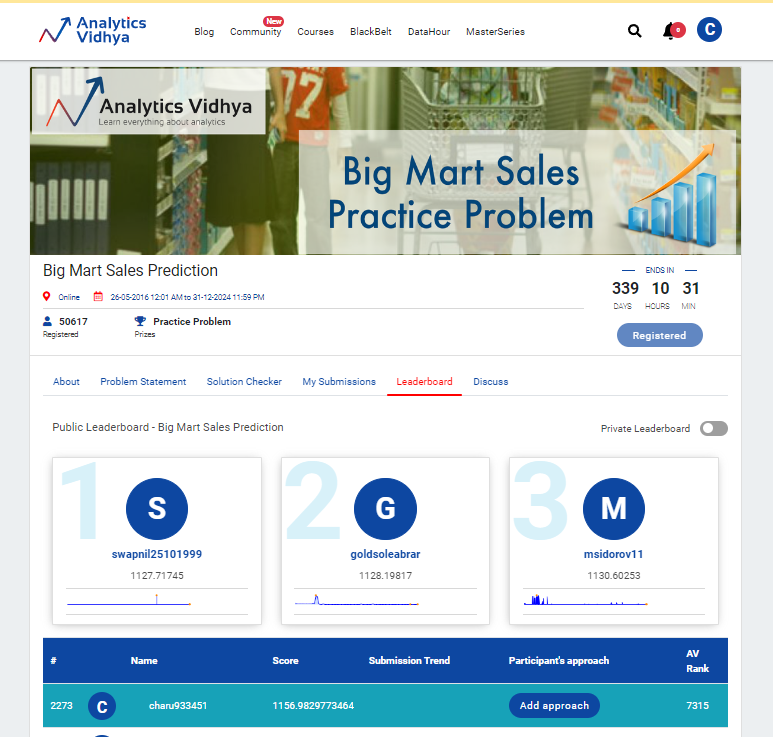